<a href="https://colab.research.google.com/github/RizqSaputra/Posttest-2-Data-Mining/blob/main/2109116105_posttest_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (1) Apriori

In [126]:
# Import Library
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv("dataset_market_basket.csv")
df

,whole milk,pasrty,salty snack,sausage,semi-finished bread,yogurt,soda,pickled vegetables,canned beer,misc. beverages,hygiene articles,rolls/buns,frankfurter,whipped/sour cream,curd,beef,white bread,butter,frozen vegetables,other vegetables,tropical fruit,sugar,butter milk,specialty chocolate,frozen meals,dental care,root vegetables,detergent,dish cleaner,cling film/bags
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [130]:
data = [['whole milk', 'pastry', 'salty snack'],
    ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
    ['soda', 'pickled vegetables'],
    ['canned beer', 'misc. beverages'],
    ['sausage', 'hygiene articles'],
    ['sausage', 'whole milk', 'rolls/buns'],
    ['whole milk', 'soda'],
    ['frankfurter', 'soda', 'whipped/sour cream'],
    ['frankfurter', 'curd'],
    ['beef', 'white bread'],
    ['butter', 'whole milk'],
    ['frozen vegetables', 'other vegetables'],
    ['tropical fruit', 'sugar'],
    ['butter milk', 'specialty chocolate'],
    ['frozen meals', 'dental care'],
    ['rolls/buns', 'rolls/buns'],
    ['root vegetables', 'detergent'],
    ['sausage', 'rolls/buns'],
    ['dish cleaner', 'cling film/bags'],
]

df = pd.DataFrame(data)
df = pd.get_dummies(df.stack()).groupby(level=1).sum()
print(df)

   beef  butter  butter milk  canned beer  cling film/bags  curd  dental care  detergent  \
0     1       1            1            1                0     0            0          0   
1     0       0            0            0                1     1            1          1   
2     0       0            0            0                0     0            0          0   
3     0       0            0            0                0     0            0          0   

   dish cleaner  frankfurter  frozen meals  frozen vegetables  hygiene articles  misc. beverages  \
0             1            2             1                  1                 0                0   
1             0            0             0                  0                 1                1   
2             0            0             0                  0                 0                0   
3             0            0             0                  0                 0                0   

   other vegetables  pastry  pickled v

In [131]:
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Buat apriori untuk mencari support
frequent_itemsets = apriori(df, min_support=0.05, use_colnames=True)

# Cari association rules dengan Association Rule Mining algorithm
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Buat tabel support untuk itemset
df_support = frequent_itemsets
df_support['support'] = df_support['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_support = df_support.rename(columns={"itemsets": "itemset"})
df_support = df_support.set_index('itemset')
print(df_support)

# Buat tabel support dan confident
df_rules = pd.DataFrame(rules, columns=['antecedents', 'consequents', 'support', 'confidence', 'lift'])

# Buat filter antecedents dan consequents
df_rules = df_rules[df_rules['antecedents'].apply(lambda x: len(x) == 1) & df_rules['consequents'].apply(lambda x: len(x) == 1)]

# Buat kolom antecedent dan consequent 
df_rules['antecedents'] = df_rules['antecedents'].apply(lambda x: list(x)[0])
df_rules['consequents'] = df_rules['consequents'].apply(lambda x: list(x)[0])

# Buat antecedent sebagai index dan sort berdasarkab confidence
df_rules = df_rules.set_index('antecedents')
df_rules = df_rules.sort_values(by=['confidence'], ascending=False)

# Buat tabel support dan confident yang sudah terfilter
df_rules = df_rules[['consequents', 'support', 'confidence']]
df_rules['support'] = df_rules['support'].apply(lambda x: "{:.2f}%".format(x*100))
df_rules['confidence'] = df_rules['confidence'].apply(lambda x: "{:.2f}%".format(x*100))
print("\n")
print("HASIL SUPPORT DAN CONFIDENCE")
print("\n")

print(df_rules)

                                                   support
itemset                                                   
(beef)                                               5.26%
(butter)                                             5.26%
(butter milk)                                        5.26%
(canned beer)                                        5.26%
(cling film/bags)                                    5.26%
...                                                    ...
(semi-finished bread, whole milk, sausage)           5.26%
(semi-finished bread, yogurt, sausage)               5.26%
(yogurt, whole milk, sausage)                        5.26%
(yogurt, whole milk, semi-finished bread)            5.26%
(semi-finished bread, yogurt, whole milk, sausage)   5.26%

[65 rows x 1 columns]


HASIL SUPPORT DAN CONFIDENCE


                            consequents support confidence
antecedents                                               
beef                        white bread   5.26%    100.00%


Gunakan dataset ini : https://drive.google.com/file/d/1BqC-2d1ZYqFIFwdjdsW5bAAqNFh2AO4C/view?usp=share_link

Dan buatlah daftar support dan confidence untuk 2 item set dengan menggunakan dataset tersebut (hint : buatlah tabel tabulasi terlebih dahulu untuk memudahkan)

#(2) KNN

Gunakan dataset ini : https://drive.google.com/file/d/1pXAJZZXCXosf0PTJkyogopKaPFxCYl22/view?usp=share_link

Kemudian buatlah tabel jarak berdasarkan data berikut ini : 

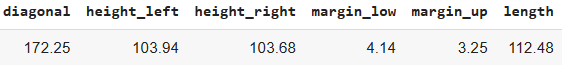
<!-- 1412 -->

In [ ]:
# 1. Tambahkan kolom jarak untuk menampilkan jarak dari dataset terhadap target prediksi
import pandas as pd

df = pd.read_csv('deteksi_uang_palsu.csv')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# Menentukan target prediksi
target = {'height_left': 172.25,
          'height_right': 103.94,
          'margin_low': 103.68,
          'margin_up': 4.14,
          'length': 3.25}

# Membuat kolom jarak
df['jarak'] = df.apply(lambda x: math.sqrt((x['height_left'] - target['height_left'])**2 + 
                                           (x['height_right'] - target['height_right'])**2 + 
                                           (x['margin_low'] - target['margin_low'])**2 + 
                                           (x['margin_up'] - target['margin_up'])**2 + 
                                           (x['length'] - target['length'])**2), axis=1)

# Menampilkan tabel jarak
df
     

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,jarak
0,True,172.06,104.24,103.66,4.24,3.10,113.02,162.985541
1,True,171.66,103.68,103.41,4.35,3.33,113.74,163.637621
2,True,172.23,104.00,103.35,4.43,2.95,113.12,163.039278
3,True,172.07,104.21,103.82,4.29,3.35,113.30,163.154696
4,True,171.79,104.57,104.04,4.26,3.15,113.46,163.132317
5,False,172.00,104.23,104.52,5.76,3.37,110.94,160.664595
6,False,171.56,104.03,103.93,5.47,3.50,111.67,161.413998
7,False,171.90,104.33,104.40,4.70,3.31,112.12,162.060927
8,False,171.84,104.06,104.10,4.87,3.25,111.04,161.346813
9,False,172.11,104.14,104.15,4.84,3.28,110.98,161.291210


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
import pandas as pd
import math

df = pd.read_csv('deteksi_uang_palsu.csv')
df

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,172.06,104.24,103.66,4.24,3.10,113.02
1,True,171.66,103.68,103.41,4.35,3.33,113.74
2,True,172.23,104.00,103.35,4.43,2.95,113.12
3,True,172.07,104.21,103.82,4.29,3.35,113.30
4,True,171.79,104.57,104.04,4.26,3.15,113.46
5,False,172.00,104.23,104.52,5.76,3.37,110.94
6,False,171.56,104.03,103.93,5.47,3.50,111.67
7,False,171.90,104.33,104.40,4.70,3.31,112.12
8,False,171.84,104.06,104.10,4.87,3.25,111.04
9,False,172.11,104.14,104.15,4.84,3.28,110.98


In [ ]:
# 2. Urutkan data berdasarkan K jarak terdekat (Untuk K nya ambil akar 2 dari banyak data)
import pandas as pd
import numpy as np

# Membaca dataset dari file CSV
df = pd.read_csv('deteksi_uang_palsu.csv')

# Memisahkan fitur dan target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Menghitung jarak dari setiap data point ke target prediksi
distances = np.sqrt(np.sum((X - y.values.reshape(-1, 1)) ** 2, axis=1))

# Mengambil K jarak terdekat
K = int(np.sqrt(len(df)))
indices = np.argsort(distances)[:K]

# Mengurutkan data berdasarkan K jarak terdekat
df_sorted = df.iloc[indices].reset_index(drop=True)

# Menyimpan hasil ke file CSV
df_sorted.to_csv('deteksi_uang_palsu_sorted.csv', index=False)
     

# hasil file csv dari penambahan kolom jarak
df_sorted = pd.read_csv('deteksi_uang_palsu_sorted.csv')
df_sorted

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,False,172.00,104.23,104.52,5.76,3.37,110.94
1,False,172.11,104.14,104.15,4.84,3.28,110.98
2,False,171.84,104.06,104.10,4.87,3.25,111.04


In [ ]:
# 3. Tentukan apa hasil prediksinya berdasarkan label terbanyak

# Load dataset
df = pd.read_csv("deteksi_uang_palsu.csv")

# Hitung jumlah masing-masing label
label_counts = df["is_genuine"].value_counts()

# Tampilkan label terbanyak
print("Hasil Prediksi adalah", label_counts.idxmax())

Hasil Prediksi adalah True


# (3) Analisis

> Nama : Muhammad Rizq Saputra

> Nim : 2109116105


Penjelasan posttest : 

Pilihlah salah satu tema dari daftar tema ini :  
1. Perbankan
2. Kesehatan
3. Ritel
4. Pendidkan

Kemudian lakukan analisis dengan menggunakan struktur CRISP-DM

Dimulai dari Business Understanding Hingga Data Preparation 
<img src="https://th.bing.com/th/id/R.f8efea41ae3cd96d86fbc5b10f81ad77?rik=K4Dr%2biIaVGvW8g&riu=http%3a%2f%2fwww.dataprix.com%2ffiles%2fCRISPDM%2fMetodologia_CRISP_DM1_html_52cdbecf.png&ehk=6ONLJMCVxE421Sjt2JJPE6MfCzrL7LLhDZQPdkJTLcw%3d&risl=&pid=ImgRaw&r=0"/>

Tentukan judul dengan ketentuan setiap orang di kelas beda-beda judulnya dan sumber datasetnya (contoh bisa prediksi atau aturan asosiasi)

Catatan : Tugas ini akan berhubungan dengan posttest terakhir (pertemuan 6)

## **Business Understanding**

Dataset : **Loan Prediction Based on Customer Behavior**

Tujuan data ini digunakan untuk memprediksi apakah pinjaman seseorang akan disetujui atau tidak berdasarkan perilaku pelanggan yang telah tercatat di bank. Bank ingin meningkatkan efisiensi dalam proses persetujuan pinjaman dan meminimalkan risiko gagal bayar dengan menggunakan model prediksi yang akurat.

## **Data Understanding**


#### Import Library

In [ ]:
# Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# Dataset
df = pd.read_csv("Training Data.csv");
train_df = pd.read_csv("Training Data.csv");
test_df = pd.read_csv("Test Data.csv");
sample_df = pd.read_csv("Sample Prediction Dataset.csv");

### Describe Data

In [ ]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Explore Data

In [ ]:
test_df['Risk_Flag'] = sample_df['risk_flag']
test_df.head()

,ID,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13,0
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10,0
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14,1
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12,0
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11,0


In [ ]:
# Membuat Listing profesi
professions = df.groupby('Profession')
list_profesi = df['Profession'].unique()

In [ ]:
avg_incomes = []
avg_age = []
avg_exp = []

for profession in list_profesi:
    p_age_mean = professions.get_group(profession)['Age'].mean()
    p_income_mean = professions.get_group(profession)['Income'].mean()
    p_exp_mean = professions.get_group(profession)['Experience'].mean()
    
    avg_incomes.append(p_income_mean)
    avg_age.append(p_age_mean)
    avg_exp.append(p_exp_mean)
pdf = pd.DataFrame({'Profession':list_profesi,
    'Rata-rata umur':avg_age,
    'Rata-rata pendapatan':avg_incomes,
    'Rata-rata pengalaman':avg_exp
})

pdf

,Profession,Rata-rata umur,Rata-rata pendapatan,Rata-rata pengalaman
0,Mechanical_engineer,49.368986,5.175032e+06,9.526548
1,Software_Developer,50.060558,4.891296e+06,10.074807
2,Technical_writer,50.406352,4.922266e+06,9.887777
3,Civil_servant,52.756175,4.947843e+06,9.993429
4,Librarian,47.707433,5.007590e+06,9.091184
5,Economist,51.081128,4.916002e+06,10.125738
6,Flight_attendant,48.058892,4.592177e+06,9.871100
7,Architect,48.586214,5.004079e+06,10.458020
8,Designer,49.913441,5.336802e+06,9.085907
9,Physician,50.371664,4.780384e+06,10.728051


#### Visualisasi Comparison

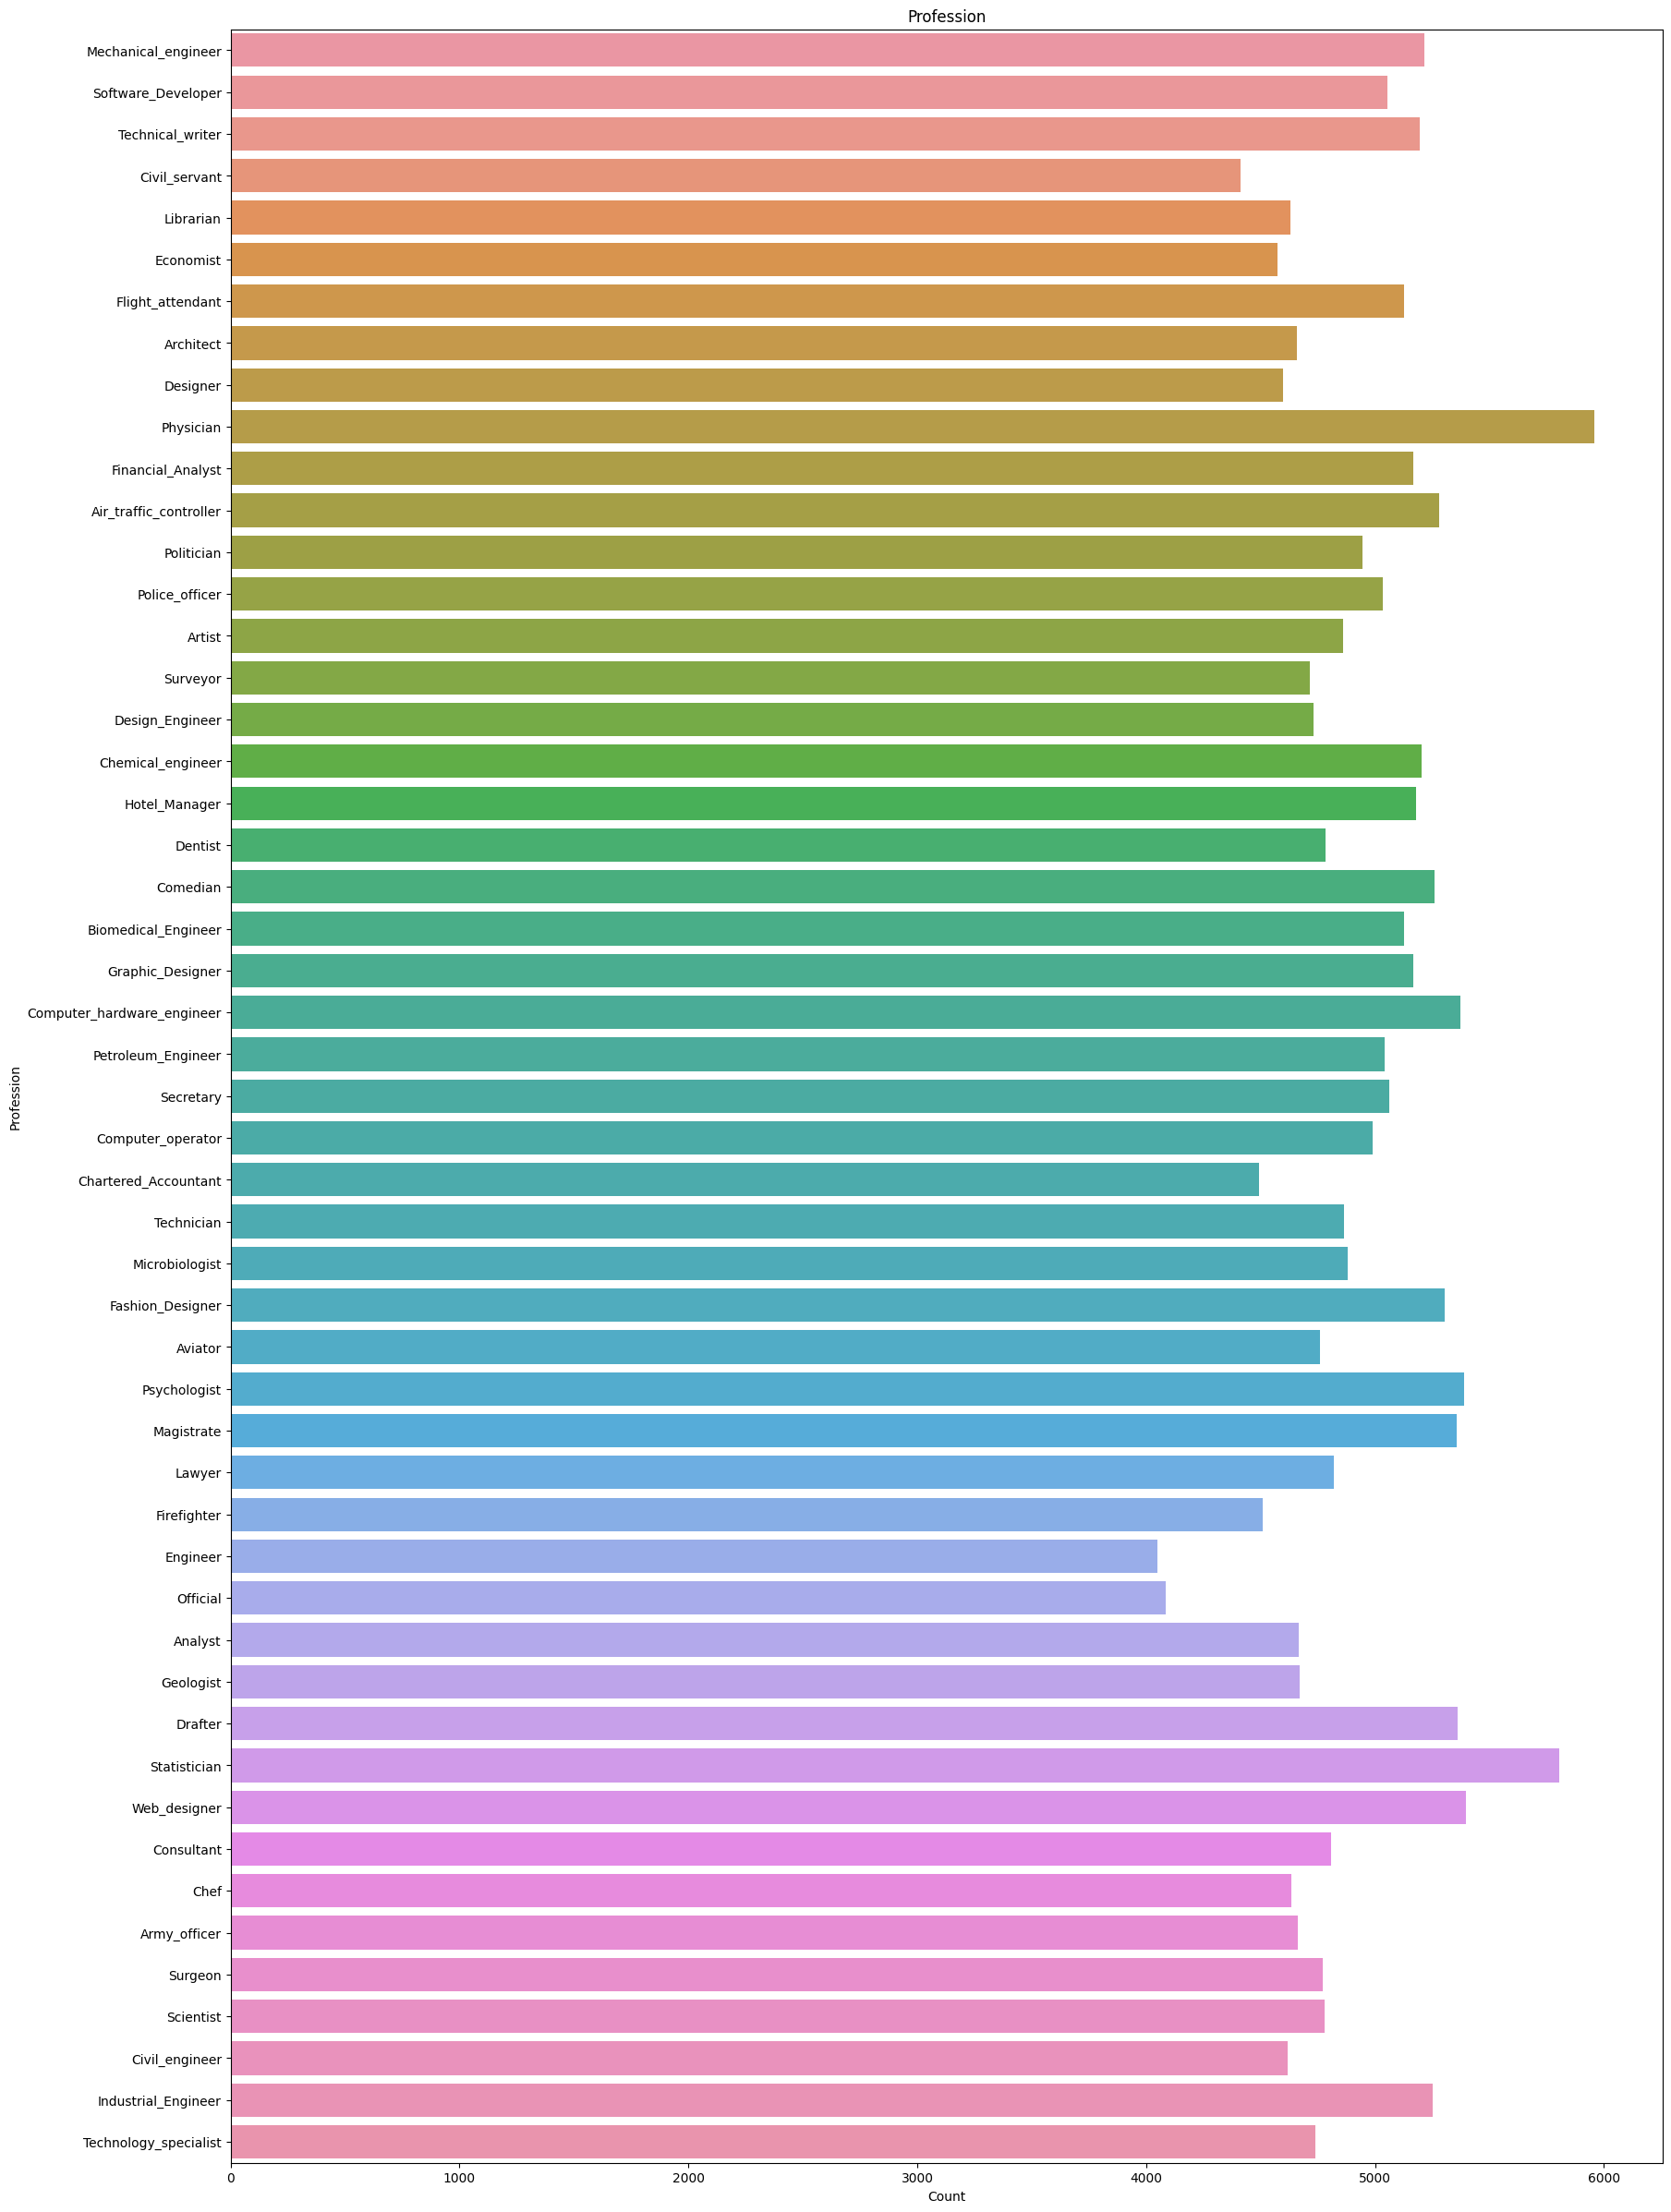

In [ ]:
# Data profesi
plt.figure(figsize=(20,30))
sns.countplot(y=df['Profession'])
plt.title("Profession")
plt.ylabel("Profession")
plt.xlabel("Count")
plt.show()

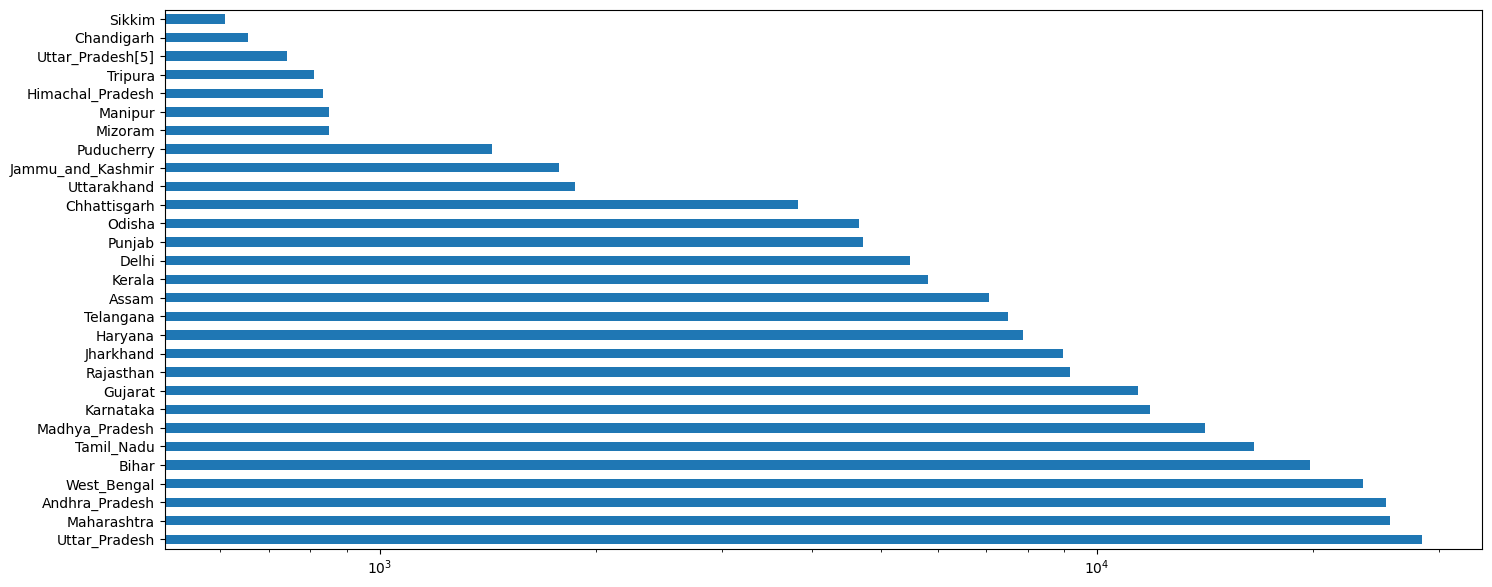

In [ ]:
# data kota tempat tinggal
plt.figure(figsize=(17,7))
df['STATE'].value_counts().plot(kind='barh')
plt.xscale('log')
plt.show()

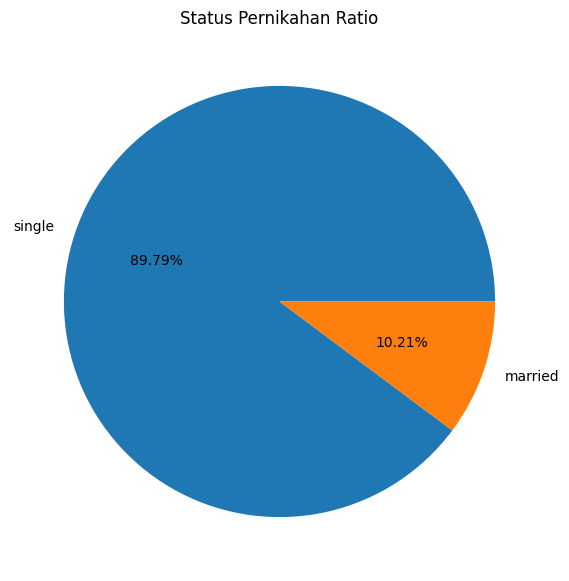

single     226272
married     25728
Name: Married/Single, dtype: int64

In [ ]:
# Ratio pernikahan
plt.figure(figsize=(7,7))
train_df['Married/Single'].value_counts().plot(kind='pie',autopct="%.2f%%")
plt.title("Status Pernikahan Ratio")
plt.ylabel("")
plt.show()
train_df['Married/Single'].value_counts()

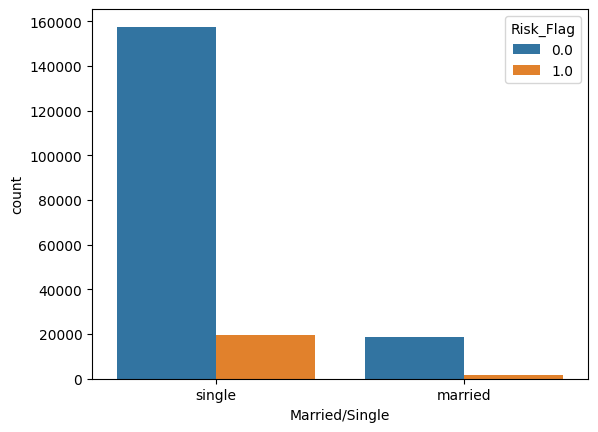

In [ ]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=df);

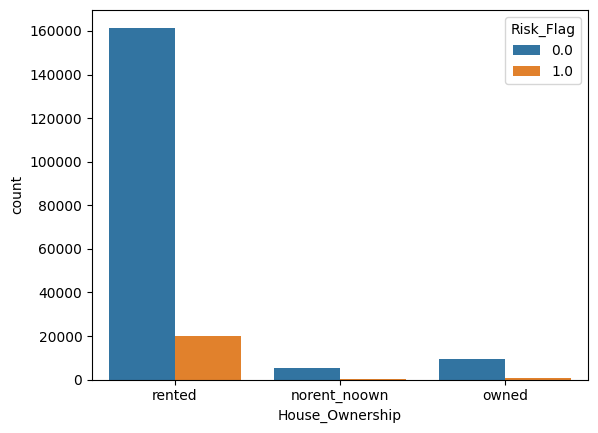

In [ ]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=df);

Visulisasi diatas menampilkan
- Visualisasi Profesi
- Visualisasi Tempat Tinggal
- Visualisasi Status Pernikahan
- Visualisasi Risiko berdasarkan Status Pernikahan
- Visualisasi Risiko berdasarkan Status Tempat tinggal

<Axes: >

[Text(0, 0.5, 'Id'),
 Text(0, 1.5, 'Income'),
 Text(0, 2.5, 'Age'),
 Text(0, 3.5, 'Experience'),
 Text(0, 4.5, 'CURRENT_JOB_YRS'),
 Text(0, 5.5, 'CURRENT_HOUSE_YRS'),
 Text(0, 6.5, 'Risk_Flag')]

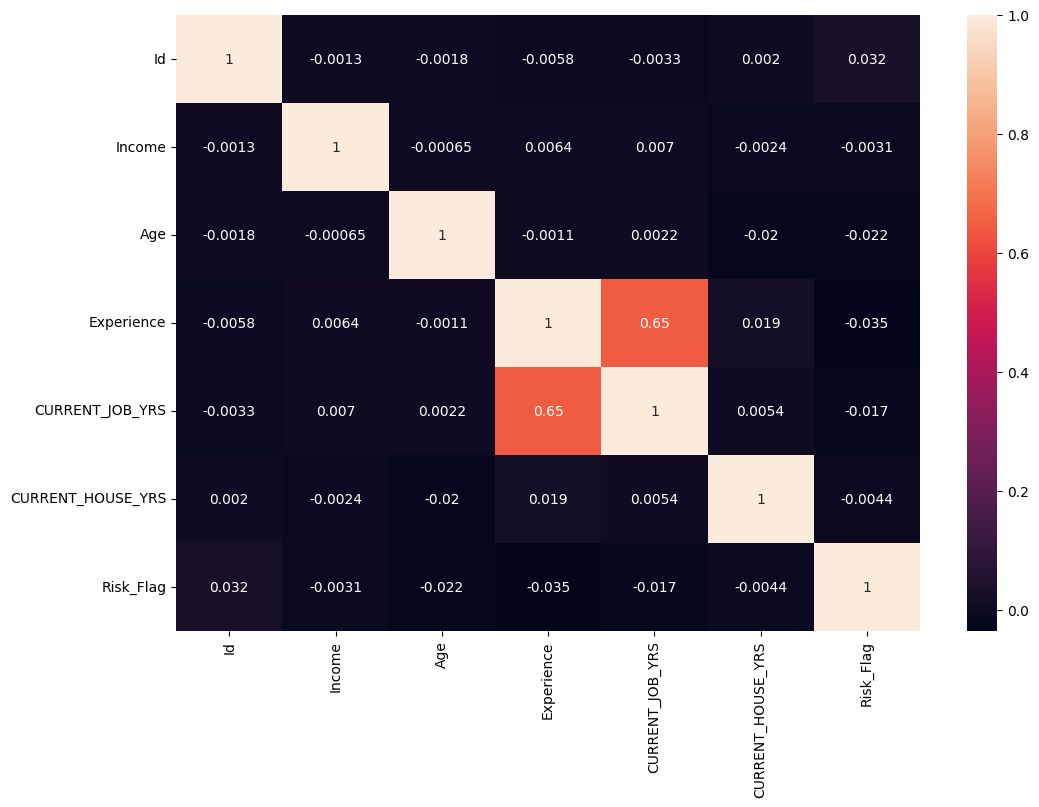

In [ ]:
cormat = df.corr()
fig, ax = plt.subplots(figsize = (12, 8))
sns.heatmap(ax = ax, data = cormat, annot = True)
ax.set_yticklabels(cormat.columns, rotation = 0)
plt.show()

## **Data Preparation**

### Select Data

In [ ]:
# Dataset
df = pd.read_csv("Training Data.csv");

### Clean Data

In [ ]:
df.isna().sum() # Menghitung jumlah nilai yang kosong pada setiap kolom

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Karena data tidak memiliki nilai kosong maka langsung ke step berikutnya

In [ ]:
len(df)

252000

Menghitung jumlah keseluruhan data

In [ ]:
df2 = df.copy(deep=True) # mengcopy data
df2

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [ ]:
# Menghapus kolom bervariasi yang tidak diperlukan
df2.drop(columns=["Id","STATE","CITY","Profession"],inplace=True)
df2

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


### Format Data

In [ ]:
# Merubah tipe data string/kategori menjadi numerik
df3 = df2.copy(deep=True) #untuk backup data

df3

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,3,13,0
1,7574516,40,10,single,rented,no,9,13,0
2,3991815,66,4,married,rented,no,4,10,0
3,6256451,41,2,single,rented,yes,2,12,1
4,5768871,47,11,single,rented,no,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,6,11,0
251996,2843572,26,10,single,rented,no,6,11,0
251997,4522448,46,7,single,rented,no,7,12,0
251998,6507128,45,0,single,rented,no,0,10,0


In [ ]:
# Mengubah nilai-nilai kategorikal menjadi numerik
df3["Car_Ownership"] = df2["Car_Ownership"].map({"yes": 1, "no": 0})
df3["Married/Single"] = df2["Married/Single"].map({"married": 1, "single": 0})
df3["House_Ownership"] = df2["House_Ownership"].map({"noown": 0, "rented": 1, "owned": 2})

df3

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,1.0,0,3,13,0
1,7574516,40,10,0,1.0,0,9,13,0
2,3991815,66,4,1,1.0,0,4,10,0
3,6256451,41,2,0,1.0,1,2,12,1
4,5768871,47,11,0,1.0,0,3,14,1
...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,1.0,0,6,11,0
251996,2843572,26,10,0,1.0,0,6,11,0
251997,4522448,46,7,0,1.0,0,7,12,0
251998,6507128,45,0,0,1.0,0,0,10,0


In [ ]:
# Menghitung jumlah nilai pada kolom risk_flag
test = df['Risk_Flag'].value_counts()
test

0    221004
1     30996
Name: Risk_Flag, dtype: int64

Karena tidak setara, kita harus membuatnya setara agar memiliki distribusi kelas yang normal.
Mengacak data sebelum membuat subsampel

In [ ]:
df = df.sample(frac=1)

# jumlah kelas penipuan 492 baris.
risk_data = df.loc[df["Risk_Flag"] == 1]
not_risk_data = df.loc[df["Risk_Flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

# acak baris dataframe
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
242555,242556,4832796,21,15,single,rented,no,Mechanical_engineer,Hubliâ€“Dharwad,Karnataka,3,10,0
14288,14289,265958,21,2,married,rented,no,Architect,Dibrugarh,Assam,2,13,0
163500,163501,3048347,36,17,single,rented,no,Air_traffic_controller,Bhatpara,West_Bengal,14,13,0
52245,52246,4544686,62,8,single,norent_noown,no,Graphic_Designer,Jamnagar,Gujarat,5,13,1
120402,120403,7210569,54,17,single,rented,no,Engineer,Aizawl,Mizoram,10,11,1


Distribusi Risk_Flag dalam kumpulan data subsampel
0   0.500
1   0.500
Name: Risk_Flag, dtype: float64


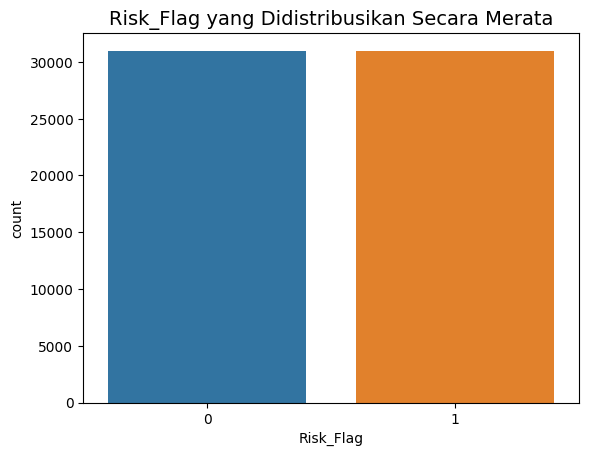

In [ ]:
print("Distribusi Risk_Flag dalam kumpulan data subsampel")
print(loan["Risk_Flag"].value_counts() / len(loan))

sns.countplot(x="Risk_Flag", data=loan)
plt.title('Risk_Flag yang Didistribusikan Secara Merata', fontsize=14);